In [38]:
# Import Required Libraries
import pandas as pd  # Importing pandas library for data manipulation
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [34]:
# Load CSV Data
data = pd.read_csv("/Users/derrickkchan/Repos/trend_following/Tesla Total Returns.csv")  # Replace 'path_to_your_csv_file.csv' with the actual path to your CSV file
data["TR_Price"] = data.TR_Price.astype(float)  # Convert the 'open' column to float and store it in a new column 'TR_Price'
data['DailyReturn'] = (data['DailyLnReturn'].apply(lambda x: (2.71828 ** x) - 1)).fillna(0)
data = data.iloc[5:]
data['RollingStdDev'] = data['DailyReturn'].rolling(window=10).std()
data.head(30) # Display more rows of the DataFrame

,DSCode,Date,TR_Price,Stale,WeeklyLnReturn,DailyLnReturn,DailyReturn,RollingStdDev
5,69568X,8/01/2020,2060.02,NaN,0.162489,0.048028,0.049200,NaN
6,69568X,9/01/2020,2014.82,NaN,0.112188,-0.022186,-0.021941,NaN
7,69568X,10/01/2020,2001.46,NaN,0.076332,-0.006653,-0.006631,NaN
8,69568X,13/01/2020,2196.99,NaN,0.150469,0.093211,0.097694,NaN
9,69568X,14/01/2020,2251.65,NaN,0.136975,0.024575,0.024879,NaN
10,69568X,15/01/2020,2170.36,NaN,0.052177,-0.036770,-0.036102,NaN
11,69568X,16/01/2020,2149.39,NaN,0.064654,-0.009709,-0.009662,NaN
12,69568X,17/01/2020,2136.88,NaN,0.065470,-0.005837,-0.005820,NaN
13,69568X,20/01/2020,2136.88,NaN,-0.027741,0.000000,0.000000,NaN
14,69568X,21/01/2020,2290.50,NaN,0.017107,0.069423,0.071890,0.043505


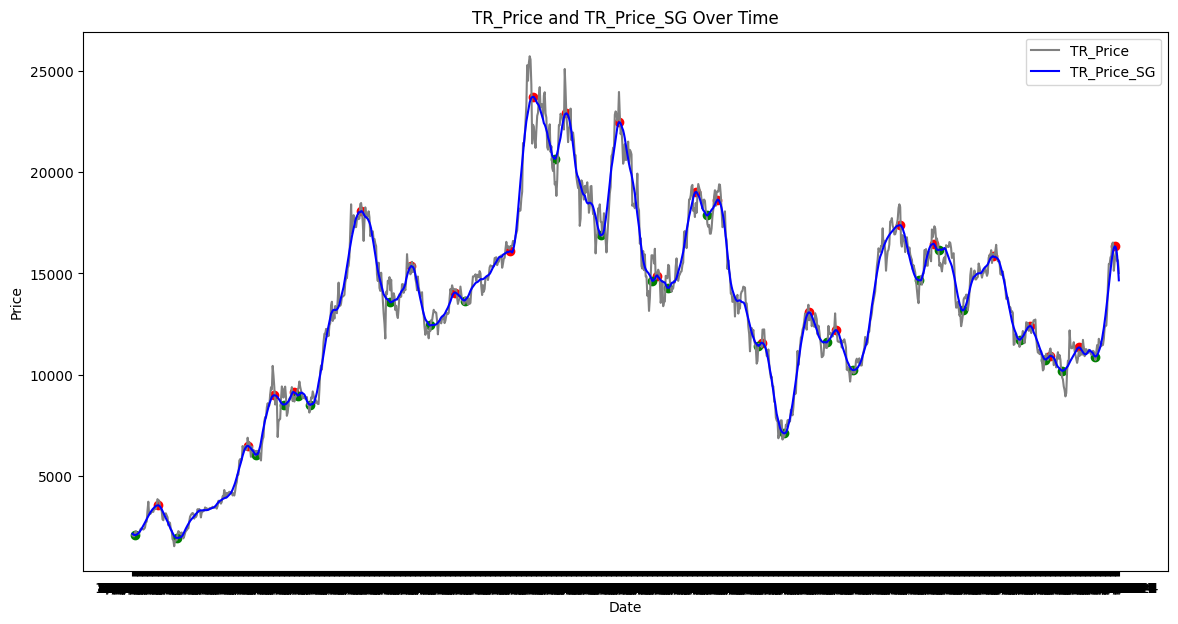

In [41]:
# Apply Savitzky-Golay filter to TR_Price
data['TR_Price_SG'] = savgol_filter(data['TR_Price'], window_length = 49, polyorder = 5)
peaks_idx, _ = find_peaks(data['TR_Price_SG'], distance = 15, width = 3, prominence = 0.1)
troughs_idx, _ = find_peaks(-1 * data['TR_Price_SG'], distance = 15, width = 3, prominence = 0.1)

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['TR_Price'], label='TR_Price', c='grey')
plt.plot(data['Date'], data['TR_Price_SG'], label='TR_Price_SG', c='b', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TR_Price and TR_Price_SG Over Time')
plt.legend()
plt.scatter(data['Date'].iloc[peaks_idx], data['TR_Price_SG'].iloc[peaks_idx], marker='o', color='red', label='Peaks')
plt.scatter(data['Date'].iloc[troughs_idx], data['TR_Price_SG'].iloc[troughs_idx], marker='o', color='green', label='Troughs')
plt.show()